In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
dataset=pd.read_csv(f'/home/dell/Documents/datasets/AirlinesCluster.csv')
dataset

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
5,16420,0,0,0,0,0,6942
6,84914,0,27482,25,0,0,6994
7,20856,0,5250,4,250,1,6938
8,443003,0,1753,43,3850,12,6948
9,104860,0,28426,28,1150,3,6931


In [3]:
dataset.columns

Index(['Balance', 'QualMiles', 'BonusMiles', 'BonusTrans', 'FlightMiles',
       'FlightTrans', 'DaysSinceEnroll'],
      dtype='object')

# clustering(kmeans)

In [4]:
 #in clustering it is compulsory that y is not present as it is unsupervised learning
dataset1=dataset   #duplicate dataset to work on
#dataset1.head().T    
dataset1.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
Balance            3999 non-null int64
QualMiles          3999 non-null int64
BonusMiles         3999 non-null int64
BonusTrans         3999 non-null int64
FlightMiles        3999 non-null int64
FlightTrans        3999 non-null int64
DaysSinceEnroll    3999 non-null int64
dtypes: int64(7)
memory usage: 218.8 KB


In [7]:
#standardize the data to normal distribution
#scale dataset to normal distribution
from sklearn import preprocessing
dataset1_standardized=preprocessing.scale(dataset1)
dataset1_standardized=pd.DataFrame(dataset1_standardized)

[27993.0, 21986.77616650405, 18131.370977425184, 15490.756814787495, 13515.207717858802, 12157.9018951619, 11044.404221804278, 10110.509525072524, 9472.725976878957, 8925.643845788112]


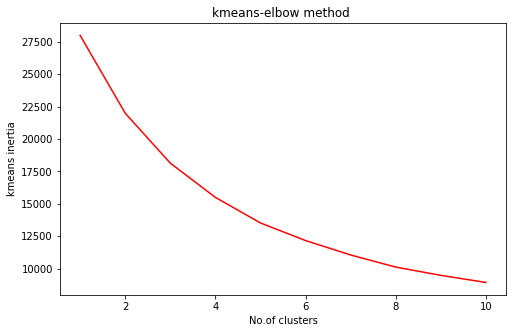

In [16]:
#find the appropriate value of k or cluster - Elbow method
plt.figure(figsize=(8,5))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.title('kmeans-elbow method ')
plt.xlabel('No.of clusters')
plt.ylabel('kmeans inertia')
plt.plot(range(1,11),wcss,c='red')
    


In [24]:
#kmeans algorithm
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(dataset1_standardized)
y_kmeans=kmeans.fit_predict(dataset1_standardized)
y_kmeans
#beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
#new dataframe cluster
cluster=pd.DataFrame(y_kmeans1)
#adding cluster to dataset1
dataset['cluster']=cluster
#mean of clusters
kmeans_mean_cluster=pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster



,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,152724.4,77.9,50999.4,21.3,479.4,1.5,4912.2
2,116472.4,5636.3,19804.3,12.5,963.0,2.9,3950.6
3,57410.4,53.4,8738.5,9.1,213.4,0.6,5828.1
4,191736.3,471.6,33093.3,28.4,5763.1,16.8,4666.4
5,38180.1,39.4,6734.2,7.6,180.0,0.6,2283.7


In [30]:
kmeans.predict([[152724,77,50999,21,479,1,4912]])

array([3], dtype=int32)

In [29]:
print(kmeans.n_clusters)
print(kmeans.cluster_centers_)

5
[[ 0.78343265 -0.08574292  1.40210526  1.00989063  0.01338988  0.02146742
   0.38290995]
 [ 0.42546416  7.09987688  0.11013129  0.09826017  0.35926311  0.40006234
  -0.08132353]
 [-0.16068347 -0.11732511 -0.34811688 -0.26055899 -0.1761986  -0.19190054
   0.82791104]
 [ 1.17240389  0.42330125  0.66044906  1.74481144  3.78781998  4.05928363
   0.2653201 ]
 [-0.35136715 -0.13527999 -0.43229738 -0.41376155 -0.19993373 -0.21556336
  -0.88871343]]


# Hierachical clustering

In [31]:
dataset2_standardized=dataset1_standardized

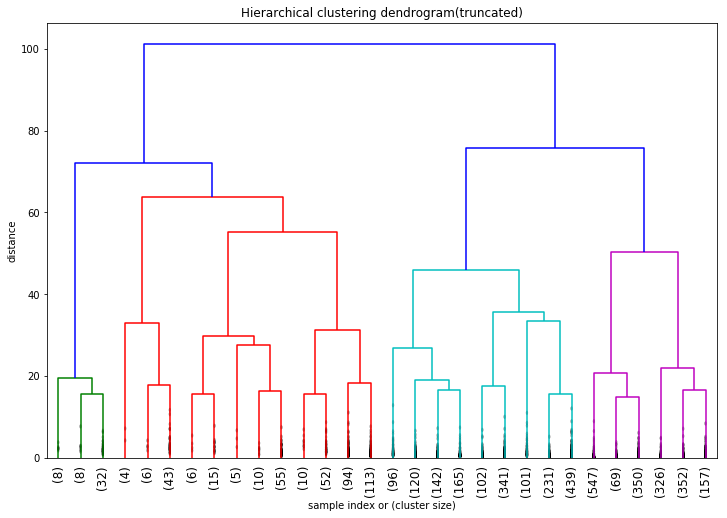

In [42]:
#dendrogram for HC
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
np.set_printoptions(precision=5,suppress=True)
#supress scientific float notation
#creating the linkage matrix
#method=ward
H_cluster=linkage(dataset2_standardized,method='ward')
plt.figure(figsize=(12,8))
plt.title('Hierarchical clustering dendrogram(truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
#show only last p merged clusters 
dendrogram(H_cluster,truncate_mode='lastp',leaf_rotation=90.,leaf_font_size=12.,show_contracted=True)
plt.show()


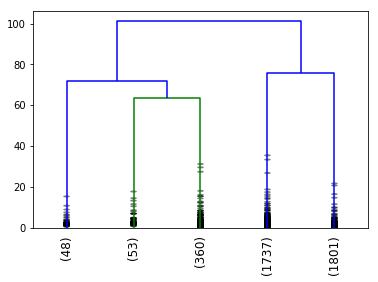

In [43]:
dendrogram(H_cluster,truncate_mode='lastp',p=5,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True)
plt.show()

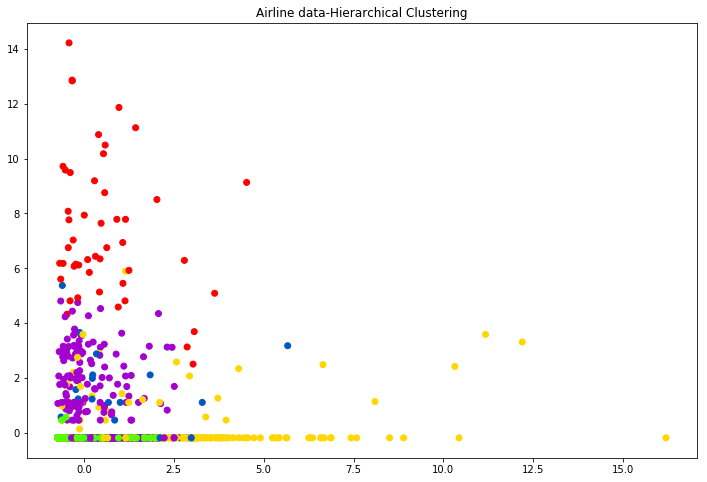

In [45]:
#Assigning the clusters and plotting the observations as per hierachical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2=fcluster(H_cluster,k,criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(12,8))
plt.scatter(dataset2_standardized.iloc[:,0],dataset2_standardized.iloc[:,1],c=cluster_2,cmap='prism')
#plot points with cluster dependent colors
plt.title('Airline data-Hierarchical Clustering')
plt.show()